## Soal 2 - EDA (Exploratory Data Analysis) Real Estate

In [1]:
import seaborn as sns
import matplotlib.pyplot as pyplot
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.stats import kurtosis, skew
from scipy import stats
from scipy.stats import norm
%matplotlib inline

In [2]:
df = pd.read_csv('melb_data.csv')

In [3]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


## 1. Untuk feature/column Landsize & Price, hitung dan beri penjelasan (insight) terkait:
* Titik Pusat Data (Central Tendency)
* Persebaran Data (Dispersion)
* Distribusi Data (Distribution)

### Titik Pusat Data (Central Tendency)
Kolom Landsize

In [22]:
print(stats.normaltest(df['Landsize'].dropna()))
print(stats.skew(df['Landsize'].dropna()))

NormaltestResult(statistic=53168.457055034734, pvalue=0.0)
95.2268805331916


Untuk memulai perhitungan Central Tendency, dilakukan pengecekan menggunakan NORMALTEST dan SKEW untuk mengetahui apakah data terdistribusi normal apa tidak. Berdasarkan hasil yang didapat dari percobaan diatas, maka dapat disimpulkan bahwa data dari kolom LANDSIZE adalah TIDAK NORMAL. Jika PVALUE yang didapat kurang dari 0.05 maka DATA TIDAK NORMAL dan jika SKEWNESS lebih dari 0 maka data juga TIDAK NORMAL.

Karena data tidak normal maka digunakan MEDIAN untuk menghitung CENTRAL TENDENCY pada kolom LANDSIZE.

In [28]:
print('Central Tendency kolom LANDSIZE adalah sebesar', df['Landsize'].median())

Central Tendency kolom LANDSIZE adalah sebesar 440.0


Kolom Price

In [26]:
print(stats.normaltest(df['Price'].dropna()))
print(stats.skew(df['Price'].dropna()))
print(stats.kurtosis(df['Price'].dropna()))

NormaltestResult(statistic=6894.345896172315, pvalue=0.0)
2.2393769237559704
9.870261848863468


In [ ]:
Walaupun nilai SKEWNESS lebih bagus dibanding kolom LANDSIZE, namun distribusi data PRICE masih TIDAK NORMAL. Bisa dilihat juga dengan hasil NORMALTEST dan KURTOSIS yang tidak normal.

Karena data tidak normal maka digunakan MEDIAN sebagai CENTRAL TENDENCY.

In [27]:
print('Central Tendency kolom PRICE adalah sebesar', df['Price'].median())

Central Tendency kolom PRICE adalah sebesar 903000.0


### Persebaran Data (Dispersion)
Kolom Landsize

In [31]:
print('Variance dari data kolom LANDSIZE adalah', df['Landsize'].var())
print('Standard Deviasi dari data kolom LANDSIZE adalah', df['Landsize'].std())

Variance dari data kolom LANDSIZE adalah 15925440.991933756
Standard Deviasi dari data kolom LANDSIZE adalah 3990.6692411090344


Kolom Price

In [33]:
print('Variance dari data kolom PRICE adalah', df['Price'].var())
print('Standard Deviasi dari data kolom PRICE adalah', df['Price'].std())

Variance dari data kolom PRICE adalah 408718202199.9009
Standard Deviasi dari data kolom PRICE adalah 639310.7242960194


### Distribusi Data (Distribution)
Kolom Landsize

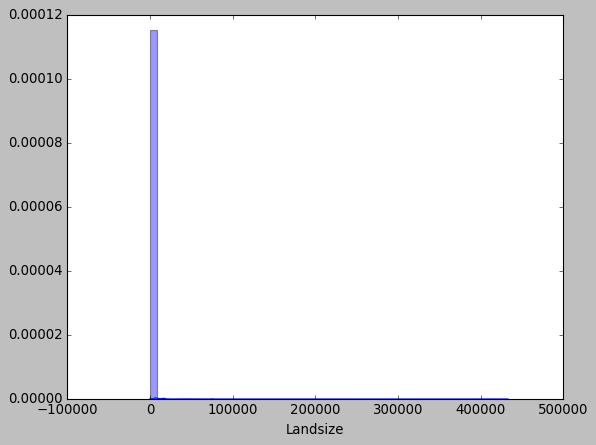

In [105]:
sns.distplot(df['Landsize'], kde=True)
plt.savefig('no1a.png')

Dari visualisasi diatas dapat disimpulkan bahwa distribusi data mayoritas ada pada landsize 0-200. 

Kolom Price

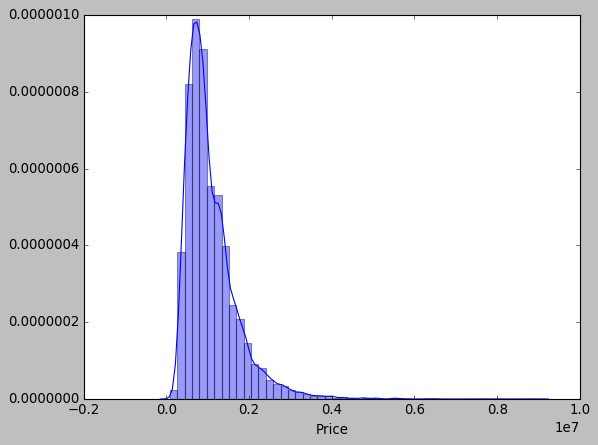

In [106]:
sns.distplot(df['Price'], kde=True)
plt.savefig('no1b.png')

Dari visualisasi diatas dapat disimpulkan bahwa distribusi data rata-rata berada pada range 0-0.17.

## 2.Carilah data outlier dan beri penjelasan (insight) pada feature/column Distance ! Tambahkan plot untuk menampilkan adanya data outlier!

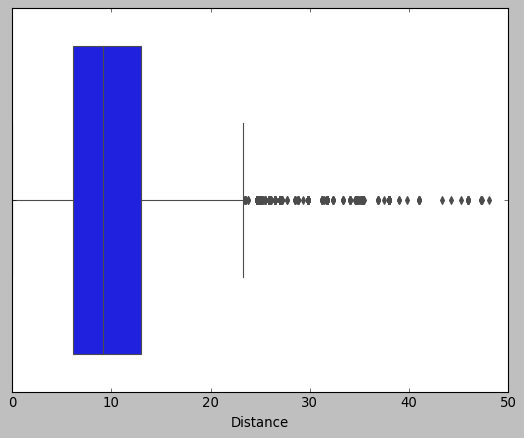

In [107]:
sns.boxplot(df['Distance'])
plt.savefig('no2.png')

In [59]:
def find_anomalies(data):
    anomalies = []
    Q1 = np.percentile(data, 25, interpolation = 'midpoint')  
    Q3 = np.percentile(data, 75, interpolation = 'midpoint')  
    IQR = Q3-Q1
    limit = IQR*1.5
    print('IQR dari data Price adalah', IQR)

    limit_bawah = Q1 - limit
    limit_atas = Q3 + limit

    for outlier in data:
        if outlier < limit_bawah or outlier > limit_atas:
            anomalies.append(outlier)
            counter = (len(anomalies))
    print('Total anomalies:', counter)
    # print('Anomalies:', anomalies)
    return anomalies

find_anomalies(df['Distance'])

IQR dari data Price adalah 6.9
Total anomalies: 411


[35.2,
 25.0,
 34.7,
 24.7,
 24.7,
 24.7,
 25.9,
 38.0,
 36.9,
 38.0,
 45.9,
 32.3,
 45.2,
 25.2,
 25.2,
 31.7,
 31.7,
 25.9,
 25.9,
 34.1,
 34.1,
 23.8,
 23.5,
 35.4,
 34.7,
 31.7,
 31.7,
 31.7,
 27.0,
 25.5,
 25.5,
 27.2,
 27.0,
 25.0,
 25.0,
 25.0,
 25.0,
 31.2,
 31.2,
 31.2,
 31.2,
 27.0,
 27.0,
 24.7,
 24.7,
 24.7,
 28.8,
 24.8,
 24.8,
 38.0,
 36.9,
 32.3,
 25.2,
 31.7,
 29.8,
 31.7,
 26.5,
 26.5,
 23.5,
 35.4,
 31.7,
 31.7,
 35.2,
 34.9,
 34.9,
 24.7,
 24.7,
 24.8,
 45.9,
 32.3,
 41.0,
 31.7,
 29.8,
 25.9,
 25.9,
 26.5,
 26.5,
 23.5,
 23.5,
 35.4,
 34.7,
 31.7,
 39.8,
 35.2,
 31.2,
 27.0,
 24.7,
 38.0,
 38.0,
 38.0,
 38.0,
 25.2,
 31.7,
 29.8,
 29.8,
 31.6,
 34.1,
 47.3,
 47.4,
 23.5,
 34.7,
 35.4,
 34.6,
 31.7,
 35.2,
 35.2,
 34.9,
 27.1,
 24.7,
 24.7,
 27.7,
 27.0,
 27.0,
 24.8,
 24.8,
 38.0,
 38.0,
 38.0,
 38.0,
 33.3,
 25.2,
 31.7,
 29.8,
 31.7,
 35.4,
 34.6,
 31.7,
 29.3,
 25.5,
 37.5,
 35.2,
 35.2,
 25.0,
 25.0,
 34.9,
 34.7,
 24.7,
 24.7,
 24.7,
 27.0,
 24.8,
 24.8,
 38.0,

Dari perhitungan dan visualisasi diatas dapat disimpulkan bahwa data outlier ada sebesar 411 buah dan dimulai dari range sekitar 24.

## 3. Tampilkan distribusi (sebaran data) dalam bentuk plot yang tepat, untuk feature/column YearBuilt. Jelaskan insight apa yang Anda dapatkan di setiap plot tersebut!

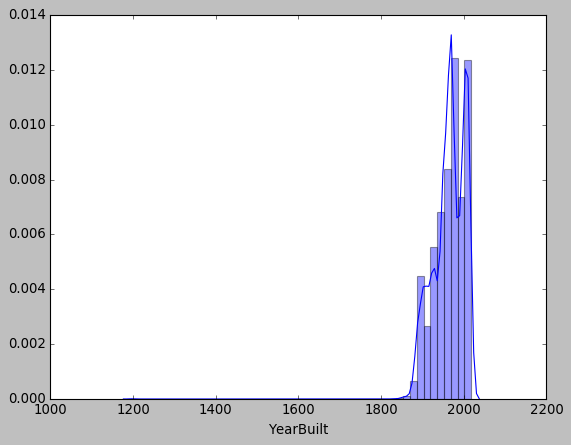

In [108]:
sns.distplot(df['YearBuilt'], kde=True)
plt.savefig('no3.png')

Dari visualisasi diatas dapat disimpulkan bahwa rumah dibangun pada tahun 1900 dan semakin tahun semkain tinggi dengan rumah yang dibangun terbanyak yaitu akhir tahun 1990an.

## 4. Tampilkan perkembangan rata-rata harga (Price) rumah berdasarkan tahun pembangunan rumah (Year) menggunakan plot yang tepat! Jelaskan (insight) perkembangan rata-rata harga rumah dari plot yang Anda buat!

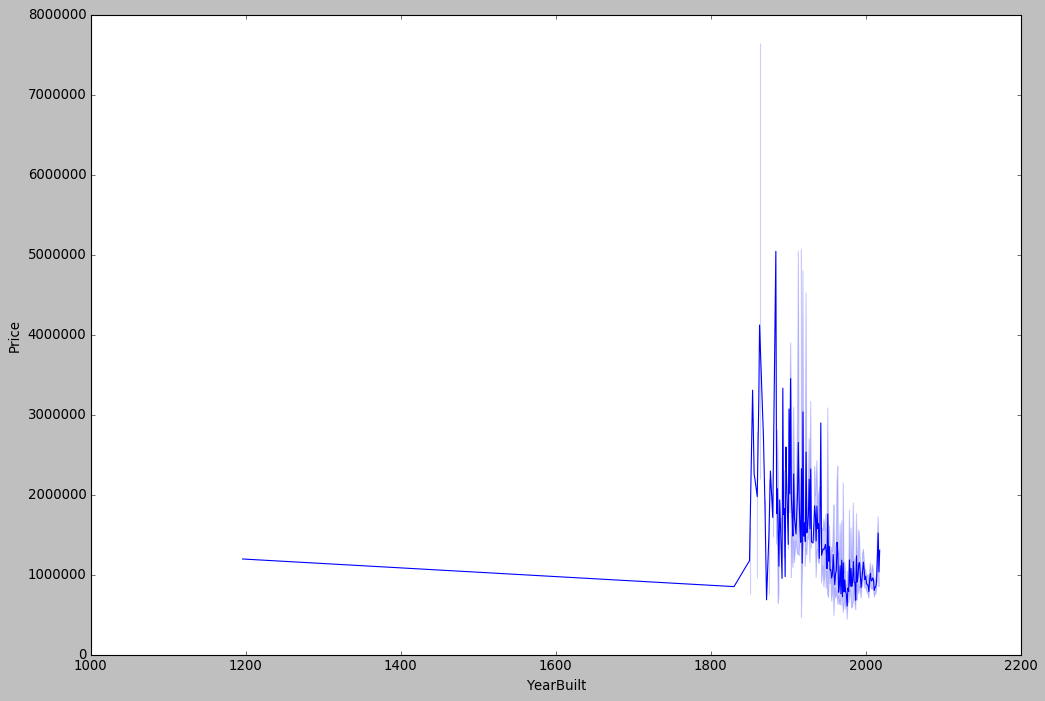

In [109]:
plt.figure(figsize=(15,10))
sns.lineplot(x='YearBuilt', y='Price', data=df)
plt.savefig('no4.png')

Untuk harga rumah berdasarkan tahun dapat dilihat bahwa pada saat rumah mulai dibangun pada tahun 1200an, harga rumah hanyak sedikit diatas 1juta dollar dan menurun sampai taun 1800an. Pelonjakan harga rumah dimulai pada akhir 1800an sampai pertengahan 1900an. Range harga pun mulai bervariasi dari akhir 1990an sampai 2000an. Sepertinya kenaikan harga property disebabkan oleh ekonomi dunia yang semakin membaik dan banyaknya ragam dari rumah dan luas yang ditawarkan, dibandingkan dengan tahun 1200-1800 dimana masih banyak terjadi perang dan kebanyakan negara dikuasai oleh kerajaan yang tidak memberikan kebebasan untuk konsumen memberli property.

## 5. Di antara Landsize, Distance, & Rooms, manakah feature/column yang memiliki nilai korelasi tertinggi pada feature/column Price? Jelaskan metode korelasi apa yang Anda gunakan, serta apa insight untuk perusahaan setelah mengetahui nilai korelasi tersebut?

In [ ]:
df.drop(['C', 'D'], axis = 1) 

In [61]:
seaborn.heatmap(df.corr[['Landsize', 'Distance', 'Rooms', 'Price']] cmap='coolwarm', annot=True)

SyntaxError: invalid syntax (<ipython-input-61-9a4b4ecf306b>, line 1)

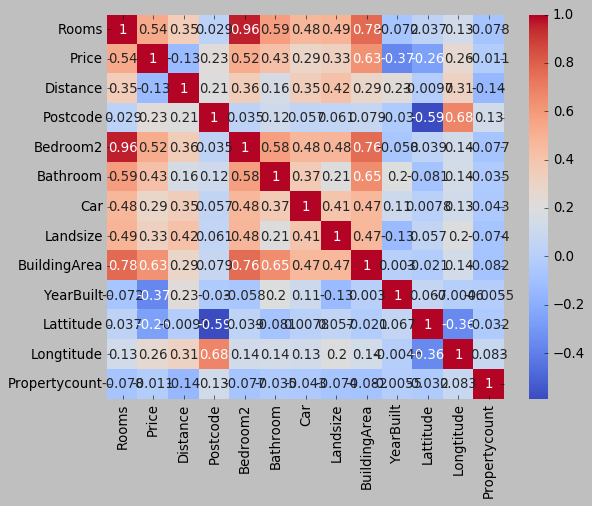

In [56]:
sns.heatmap(df.corr(method='spearman'), cmap='coolwarm', annot=True)

In [63]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


## 6. Temukan RegionName yang rata-rata harga (Price) propertinya paling tinggi, serta tampilkan RegionName dan rata-rata harga rumah dalam bentuk Barplot! Lalu, di region yang memiliki rata-rata harga properti tertinggi, carilah:

* Lima CouncilArea yang memiliki rata-rata harga rumah tertinggi!
* Tipe properti (Type) yang memiliki rata-rata harga rumah tertinggi!
* Metode penjualan properti (Method) yang paling sering dilakukan!

In [75]:
df2 = df.groupby('Regionname').mean()[['Price']].sort_values(by='Price', ascending=False)

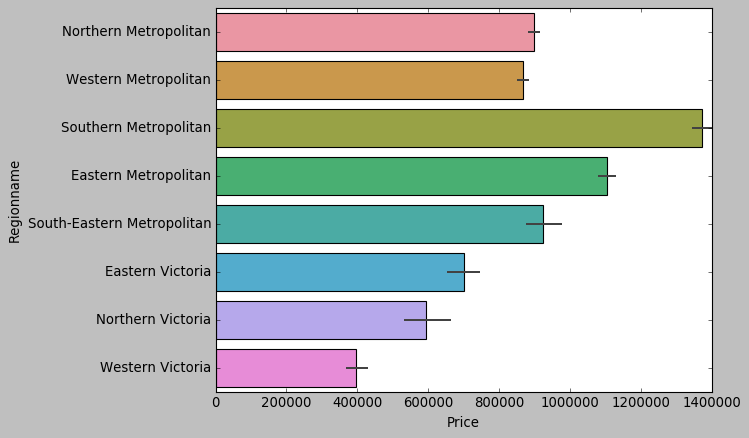

In [104]:
sns.barplot(x='Price', y='Regionname', data=df)
plt.savefig('no6.png')

Lima CouncilArea yang memiliki rata-rata harga rumah tertinggi!

In [98]:
df[df['Regionname'] == 'Southern Metropolitan'].sort_values(by='Price').groupby('Regionname')[['CouncilArea', 'Price']].head(10)

Price    229000.0
dtype: float64

In [102]:
df(df['Regionname'] == 'Southern Metropolitan').mean()['Price'].head()

TypeError: 'DataFrame' object is not callable

Tipe properti (Type) yang memiliki rata-rata harga rumah tertinggi!

Metode penjualan properti (Method) yang paling sering dilakukan!

## 7. Lakukan Uji Hipotesis untuk menguji apakah ada perbedaan harga properti antar Region Name! (Anggap Price memiliki distribusi normal)